## step 1 - Data Import & clean

### PERWAVE SUPPLIER REPORT

In [ ]:
import pandas as pd

# Define data types for reading the Excel file
dtype = {
    'Supplier': 'str',
    'Created On': 'str',
    'Reference ID': 'str',
    'Supplier ID': 'str',
    'Supplier Approval Status': 'str',
    'Company Restrictions': 'str',
    'Supplier Category': 'str',
    'Supplier Group': 'str',
    'Supplier Status': 'str',
    'Supplier Status Change Reason': 'str',
    'Supplier Status Change Reason Description': 'str',
    'Certificate of Insurance Date': 'str',
    'Customer Account Number': 'str',
    'DUNS Number': 'str',
    'Supplier Children': 'str',
    'Parent Supplier': 'str',
    'Supplier Security Segments': 'str',
    'Primary Remit-To Address': 'str',
    'Default Phone Number': 'str',
    'Primary Email Address': 'str',
    'Supplier Contacts': 'str',
    'Default Payment Terms': 'str',
    'Payment Types Accepted': 'str',
    'Default Payment Type': 'str'
}

# Read the per wave supplier report
supplier_perwave = pd.read_excel(
    'D:\\Users\\diana.fernandez\\Downloads\\Extract_Suppliers - April & May 2024.xlsx',
    sheet_name='Extract Suppliers', skiprows=1,dtype=dtype
)

# Clean whitespaces in specific columns
supplier_perwave['Supplier ID'] = supplier_perwave['Supplier ID'].str.strip()
supplier_perwave['Supplier'] = supplier_perwave['Supplier'].str.strip()

# Fill null values, strip whitespaces, and create 'ASSETID'
supplier_perwave['Supplier ID'] = supplier_perwave['Supplier ID'].fillna('missing').str.strip()
supplier_perwave['Supplier'] = supplier_perwave['Supplier'].fillna('missing').str.strip()
supplier_perwave['ASSETID'] = supplier_perwave['Supplier ID'] + supplier_perwave['Supplier']

# Fill null values with a placeholder
supplier_perwave['Supplier ID'] = supplier_perwave['Supplier ID'].fillna('missing')
supplier_perwave['Supplier'] = supplier_perwave['Supplier'].fillna('missing')

# Create an ASSETID combining Supplier ID and Supplier name
supplier_perwave['ASSETID'] = supplier_perwave['Supplier ID'].astype(str) + supplier_perwave['Supplier'].astype(str)

# Drop duplicates based on the ASSETID
supplier_perwave.drop_duplicates(subset='ASSETID', inplace=True)

# Set 'ASSETID' as index
supplier_perwave.set_index('ASSETID', inplace=True)

# Add 'Added Date' field
supplier_perwave['Added Date'] = '2024-01-05'

# Print DataFrame info
print(f"Perwave initial shape: {supplier_perwave.shape}")
print(f"Distinct Supplier ID count: {supplier_perwave['Supplier ID'].nunique()}")
print(f"Distinct Supplier name count: {supplier_perwave['Supplier'].nunique()}")
print(f"Distinct ASSETID count: {supplier_perwave.index.nunique()}")


Perwave initial shape: (813, 25)
Distinct Supplier ID count: 813
Distinct Supplier name count: 813
Distinct ASSETID count: 813


In [ ]:
import pandas as pd

# Assuming supplier_perwave is your DataFrame
# If it's not yet defined, you can import it before running this script

# Handle missing values and ensure all data is treated as strings
supplier_perwave['Primary Remit-To Address'] = (
    supplier_perwave['Primary Remit-To Address'].fillna('').astype(str)
)

# Splitting the address into parts and reversing the order of lines within each entry
address_parts = supplier_perwave['Primary Remit-To Address'].apply(
    lambda x: pd.Series(x.split('\n')[::-1])
)

# Ensure there are always at least three parts for the country, cityStateZip, and address
for i in range(3):
    if i not in address_parts.columns:
        address_parts[i] = ''

# Assigning columns to the main DataFrame from reversed parts
supplier_perwave['Supplier Country'] = address_parts[0].str.strip()
supplier_perwave['CityStateZip'] = address_parts[1].str.strip()
supplier_perwave['Supplier Address 1'] = address_parts[2].str.strip()

# Extracting city, state, and zip code
city_state_zip = supplier_perwave['CityStateZip'].str.extract(r'([^,]+),\s*([A-Z]{2})\s*(\d+)')
supplier_perwave['Supplier City'] = city_state_zip[0]
supplier_perwave['Supplier State'] = city_state_zip[1]
supplier_perwave['Supplier Zip Postal Code'] = city_state_zip[2]

# Print only the newly created columns
print(supplier_perwave[['Supplier Address 1', 'Supplier City', 'Supplier State', 'Supplier Zip Postal Code', 'Supplier Country']])



                                                   Supplier Address 1  \
ASSETID                                                                 
435007 Process Services, Inc.                         4834 Swiss Ave.   
S-02702nd & Short Consulting, LLC  8901 River Crossing Blvd Suite 467   
546360 Advanced, Inc                         200 Central Ave Ste 2100   
S-02585bestthings.com                             390 LARRY UTECK BLV   
56872Point Inc.                                   1111 Sixth Ave #300   
...                                                               ...   
S-0316Zendesk, Inc.                                    1019 Market St   
670Zenon, LLC                                              11th Floor   
685Zeta Global Corp                                         5th Floor   
S-0307Ziprecruiter                                                NaN   
S-0311Zoom                                                        NaN   

                                   Supplier City S

In [ ]:
import pandas as pd

# Handle missing values and ensure all data is treated as strings
supplier_perwave['Primary Remit-To Address'] = (
    supplier_perwave['Primary Remit-To Address'].fillna('').astype(str)
)

# Splitting the address into parts and reversing the order of lines within each entry
address_parts = supplier_perwave['Primary Remit-To Address'].apply(
    lambda x: pd.Series(x.split('\n')[::-1])
)

# Ensure there are always at least three parts for the country, cityStateZip, and address
for i in range(3):
    if i not in address_parts.columns:
        address_parts[i] = ''

# Assigning columns to the main DataFrame from reversed parts
supplier_perwave['Supplier Country'] = address_parts[0].str.strip()
supplier_perwave['CityStateZip'] = address_parts[1].str.strip()
supplier_perwave['Supplier Address 1'] = address_parts[2].str.strip()

# Extracting city, state, and zip code
city_state_zip = supplier_perwave['CityStateZip'].str.extract(r'([^,]+),\s*([A-Z]{2})\s*(\d+)')
supplier_perwave['Supplier City'] = city_state_zip[0]
supplier_perwave['Supplier State'] = city_state_zip[1]
supplier_perwave['Supplier Zip Postal Code'] = city_state_zip[2]

# Print only the newly created columns
print(supplier_perwave[['Supplier Address 1', 'Supplier City', 'Supplier State', 'Supplier Zip Postal Code', 'Supplier Country']])


                                                   Supplier Address 1  \
ASSETID                                                                 
435007 Process Services, Inc.                         4834 Swiss Ave.   
S-02702nd & Short Consulting, LLC  8901 River Crossing Blvd Suite 467   
546360 Advanced, Inc                         200 Central Ave Ste 2100   
S-02585bestthings.com                             390 LARRY UTECK BLV   
56872Point Inc.                                   1111 Sixth Ave #300   
...                                                               ...   
S-0316Zendesk, Inc.                                    1019 Market St   
670Zenon, LLC                                              11th Floor   
685Zeta Global Corp                                         5th Floor   
S-0307Ziprecruiter                                                NaN   
S-0311Zoom                                                        NaN   

                                   Supplier City S

### HISTORICAL SUPPLIER

In [ ]:
import pandas as pd

# Define data types for reading the CSV file
supplier_masterype = {
    'ASSETID': 'str',
    'Supplier': 'str',
    'Created On': 'str',
    'Reference ID': 'str',
    'Supplier ID': 'str',
    'Supplier Approval Status': 'str',
    'Company Restrictions': 'str',
    'Supplier Category': 'str',
    'Supplier Group': 'str',
    'Supplier Status': 'str',
    'Supplier Status Change Reason': 'str',
    'Supplier Status Change Reason Description': 'str',
    'Certificate of Insurance Date': 'str',
    'Customer Account Number': 'str',
    'DUNS Number': 'str',
    'Supplier Children': 'str',
    'Parent Supplier': 'str',
    'Supplier Security Segments': 'str',
    'Primary Remit-To Address': 'str',
    'Default Phone Number': 'str',
    'Primary Email Address': 'str',
    'Supplier Contacts': 'str',
    'Default Payment Terms': 'str',
    'Payment Types Accepted': 'str',
    'Default Payment Type': 'str',
    'Added Date': 'str',
    'SPEND_UNDER_CONTRACT': 'str'
}

# Read the supplier master
supplier_master = pd.read_csv('HPO Supplier Master 6.4.24b.csv', encoding='UTF-8-SIG', dtype=supplier_masterype)

# Fill null values with a placeholder and strip whitespaces in specific columns
supplier_master['Supplier ID'] = supplier_master['Supplier ID'].fillna('missing').str.strip()
supplier_master['Supplier'] = supplier_master['Supplier'].fillna('missing').str.strip()

# Overwrite the ASSETID column combining Supplier ID and Supplier name
supplier_master['ASSETID'] = supplier_master['Supplier ID'] + supplier_master['Supplier']

# Drop duplicates based on the Supplier ID
supplier_master.drop_duplicates(subset='Supplier ID', inplace=True)

# Set ASSETID as the index
supplier_master.set_index('ASSETID', inplace=True)

# Print DataFrame info
print(f"Master file initial shape: {supplier_master.shape}")

# Print distinct value counts
print(f"Distinct Supplier ID count: {supplier_master['Supplier ID'].nunique()}")
print(f"Distinct Supplier name count: {supplier_master['Supplier'].nunique()}")
print(f"Distinct ASSETID count: {supplier_master.index.nunique()}")


Master file initial shape: (798, 15)
Distinct Supplier ID count: 798
Distinct Supplier name count: 798
Distinct ASSETID count: 798


## step 2. Complete the supplier master

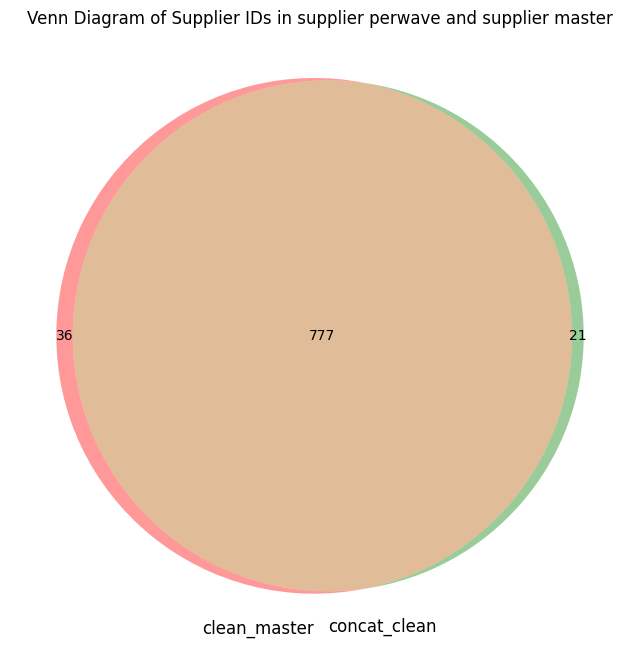

Total suppliers in supplier master: 813
Total suppliers in supplier perwave : 798
Intersection count: 777
Unique to Supplier Perwave: 36
Unique to Supplier Master: 21


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Assuming clean_master and concat_clean are already loaded and have ASSETID set as index

# Extract ASSETID sets
asset_ids_master = set(supplier_perwave.index)
asset_ids_concat = set(supplier_master.index)

# Create a Venn diagram
plt.figure(figsize=(8, 8))
venn2([asset_ids_master, asset_ids_concat], ('clean_master', 'concat_clean'))
plt.title('Venn Diagram of Supplier IDs in supplier perwave and supplier master')
plt.show()

# Calculate intersection and unique counts
intersection_count = len(asset_ids_master & asset_ids_concat)
unique_master_count = len(asset_ids_master - asset_ids_concat)
unique_concat_count = len(asset_ids_concat - asset_ids_master)

# Output counts
print("Total suppliers in supplier master:", len(asset_ids_master))
print("Total suppliers in supplier perwave :", len(asset_ids_concat))
print("Intersection count:", intersection_count)
print("Unique to Supplier Perwave:", unique_master_count)
print("Unique to Supplier Master:", unique_concat_count)


In [ ]:
import pandas as pd

# Define the structure of final_master with data types
final_master_structure = {
    'Supplier ID': 'str',
    'Supplier': 'str',
    'Supplier Category': 'str',
    'Supplier Group': 'str',
    'Primary Remit-To Address': 'str',
    'Supplier Address 1': 'str',
    'Supplier City': 'str',
    'Supplier State': 'str',
    'Supplier Zip Postal Code': 'str',
    'Supplier Country': 'str',
    'Default Payment Terms': 'str',
    'Default Currency': 'str',
    'Tax ID': 'str',
    'Added Date': 'str'
}

# Create an empty DataFrame with the declared table structure
final_master = pd.DataFrame(columns=final_master_structure.keys())

# Add master data to final_master
final_master = pd.concat([final_master, supplier_master[list(final_master_structure.keys())]], ignore_index=True)

# Print distinct value counts
print(f"Distinct Supplier ID count: {final_master['Supplier ID'].nunique()}")
print(f"Distinct Supplier name count: {final_master['Supplier'].nunique()}")
print(f"Distinct ASSETID count: {final_master.index.nunique()}")


Distinct Supplier ID count: 798
Distinct Supplier name count: 798
Distinct ASSETID count: 798


In [ ]:
# Merging clean_master and perwave with informative suffixes
merged_df = supplier_master.merge(supplier_perwave, on='Supplier ID', how='outer', suffixes=('_master', '_perwave'))

# Identify new suppliers using the '_perwave' suffix to find entries exclusive to perwave
new_suppliers = merged_df[merged_df['Supplier_master'].isna()]  # Entries only in perwave

# Reformat new_suppliers to include only shared columns with final_master structure, renaming to drop '_perwave'
shared_columns = set(final_master_structure.keys()).intersection(set(column.replace('_perwave', '') for column in new_suppliers.columns))
new_suppliers = new_suppliers[[col for col in new_suppliers.columns if col.replace('_perwave', '') in shared_columns]]
new_suppliers.columns = new_suppliers.columns.str.replace('_perwave', '')  # Adjust column names to match final_master

# Append new suppliers to final_master, aligning with the existing structure
final_master = pd.concat([final_master, new_suppliers], ignore_index=True)

# Crate and assign the index
final_master['ASSETID'] = final_master['Supplier ID'].astype(str) + final_master['Supplier'].astype(str)
final_master.set_index('ASSETID', inplace=True)

# Print the updated DataFrame shape and some entries to inspect it
print("Final master DataFrame shape:", final_master.shape)
print("Number of new suppliers added:", len(new_suppliers))
print(final_master.head())


Final master DataFrame shape: (813, 14)
Number of new suppliers added: 15
                               Supplier ID                     Supplier  \
ASSETID                                                                   
515Medicare Advisors 365, LLC          515   Medicare Advisors 365, LLC   
518Easy Health, Inc.                   518            Easy Health, Inc.   
S-0146FIAI Inc.                     S-0146                    FIAI Inc.   
S-0276Cross Insurance               S-0276              Cross Insurance   
359Corporation Service Company         359  Corporation Service Company   

                               Supplier Category      Supplier Group  \
ASSETID                                                                
515Medicare Advisors 365, LLC              Leads  Leads - Affiliates   
518Easy Health, Inc.                       Leads  Leads - Affiliates   
S-0146FIAI Inc.                            Leads                 NaN   
S-0276Cross Insurance                   

In [ ]:
# Export the final result
final_master.to_csv('HPO Supplier Master 7.3.24c.csv', encoding='UTF-8-SIG')